<a href="https://colab.research.google.com/github/SoundNandu/AirBnb-Analysis/blob/master/notebooks/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#mount to google colab 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.layers import Conv1D, Dense, Dropout, Activation, Embedding, GlobalMaxPool1D

# Feature Eng

Reading the file from the folder , adding columns names 'label','words'

In [0]:
df = pd.read_csv("/content/drive/Shared drives/Mine/classification/data/shuffled-full-set-hashed.csv", header=None, names=['label','words'])

In [0]:
print("Before dropping NAs, we had",df.shape[0]," rows of data");
df.dropna(inplace=True)
print("After dropping NAs, we have", df.shape[0]," rows of data\n");

Before dropping NAs, we had 62204  rows of data
After dropping NAs, we have 62159  rows of data



Shapes of the data and column

In [0]:
df.shape

(62159, 2)

In [0]:
num_words = 100000
max_len = 500

tokenizer = Tokenizer(num_words=num_words)
#tokeninzing
tokenizer.fit_on_texts(df['words'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(df['words'].values)
X = pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

Found 1037934 unique tokens.
Shape of data tensor: (62159, 500)


In [0]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (62159, 14)


Spilting the data into train and test where train data is 80% and test datae is 20%

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(49727, 500) (49727, 14)
(12432, 500) (12432, 14)


# Model

In [0]:
vocabulary_size = len(tokenizer.word_index)
mxlen = 500
# This is fixed.
EMBEDDING_DIM = 100

In [0]:
#A recurrent neural network (RNN) is a class of artificial neural network where connections between nodes form a directed graph along a sequence. 
#we have used Embedding and desnse layer and categorical_crossentropy since its a multi class classification problem.
model = Sequential()
model.add(Embedding(vocabulary_size, 100, input_length=mxlen))
model.add(Flatten())
model.add(Dense(activation="relu", input_dim=100, units=50, kernel_initializer="uniform"))
model.add(Dense(activation="relu", units=24, kernel_initializer="uniform"))
model.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))
model.add(Dense(activation="sigmoid", units=14, kernel_initializer="uniform"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          103793400 
_________________________________________________________________
flatten_1 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2500050   
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1224      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_4 (Dense)              (None, 14)                126       
Total params: 106,295,000
Trainable params: 106,295,000
Non-trainable params: 0
________________________________________

Building the model with fit function

In [0]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=10,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44754 samples, validate on 4973 samples
Epoch 1/10
44754/44754 [==============================] - 874s 20ms/step - loss: 1.4311 - accuracy: 0.4725 - val_loss: 0.7349 - val_accuracy: 0.7776
Epoch 2/10
44754/44754 [==============================] - 873s 20ms/step - loss: 0.5695 - accuracy: 0.8278 - val_loss: 0.6063 - val_accuracy: 0.8218
Epoch 3/10
44754/44754 [==============================] - 874s 20ms/step - loss: 0.3308 - accuracy: 0.8997 - val_loss: 0.6849 - val_accuracy: 0.8138
Epoch 4/10
44754/44754 [==============================] - 874s 20ms/step - loss: 0.2103 - accuracy: 0.9324 - val_loss: 0.8089 - val_accuracy: 0.8110
Epoch 5/10
44754/44754 [==============================] - 872s 19ms/step - loss: 0.1703 - accuracy: 0.9425 - val_loss: 0.8852 - val_accuracy: 0.8178


Evaluate the model

In [0]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12432/12432 [==============================] - 3s 224us/step
Test set
  Loss: 0.896
  Accuracy: 0.804


Save the model

In [0]:
model.save('/content/drive/Shared drives/Mine/classification/models/ANN.h5')

Loading the model

In [0]:
loaded_model = load_model('/content/drive/Shared drives/Mine/classification/models/ANN.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
import pickle 
# Save the trained model as a pickle string. 
pickle.dump(tokenizer, open('/content/drive/Shared drives/Mine/classification/models/token.pkl', 'wb'))
vectorizer_pickle = pickle.load(open('/content/drive/Shared drives/Mine/classification/models/token.pkl', 'rb'))

# Prediction

In [0]:
labels = ['APPLICATION', 'BILL', 'BILL BINDER', 'BINDER', 'CANCELLATION NOTICE','CHANGE ENDORSEMENT', 'DECLARATION', 'DELETION OF INTEREST','EXPIRATION NOTICE', 'INTENT TO CANCEL NOTICE', 'NON-RENEWAL NOTICE','POLICY CHANGE', 'REINSTATEMENT NOTICE', 'RETURNED CHECK']
document = ['26f7353edc2e fdf32f896cc3 70f06d7a2533 eeb86a6a04e4 656b219766dc 572b3238a2c4 77ac9d61ee2e da2e1b058e4b 5b6bc2f0bdb1 9cdf4a63deb0 ee0c03371a49 b59e343416f7 6b304aabdcee 572b3238a2c4 8159faa9d80d 628863dfcdcd c64dd4330ce5 4e5019f629a9 6ce6cc5a3203 798fe9915030 f62c5f87f0af 0562c756a2f2 0562c756a2f2 1b6d0614f2c7 f0666bdbc8a5 5ee06767bc0f 586242498a88 1ab34730c1e0 6b343f522f78 2a6fbe672600 69056c5109b2 1c303d15eb65 f62c5f87f0af ed1e3242ee34 c9a53ea6e219 5ee06767bc0f c12d8d8d9530 7d41ca882f26 094453b4e4ae d38820625542 f62c5f87f0af 6ca2dd348663 6dcc75eaf823 f9b20c280980 1b6d0614f2c7 3486e5fe0d73 549330b9e320 f62c5f87f0af 586242498a88 1068682ce752 26f768da5068 6af770640118 bad6ff5dd7bc 67f9c02008c6 586242498a88 1068682ce752 1068682ce752 6ca2dd348663 b208ae1e8232 d38820625542 7d9e333a86da 04503bc22789 ce1f034abb5d 7420f0cec354 1015893e384a 5e99d31d8fa4 5c02c2aaa67b 93790ade6682 a65259ff0092 6c8642055a4e 4357c81e10c1 f0fd45d01d0a a31962fbd5f3 b61f1af56200 ffca4a0468c8 036087ac04f9 b136f6349cf3 a86f2ba617ec 31e348ce8673 b208ae1e8232 a4a3e609776f 93c988b67c47 93790ade6682 a65259ff0092 d0a6ba7c50bf 4357c81e10c1 ee0c03371a49 a31962fbd5f3 b61f1af56200 8159faa9d80d 036087ac04f9 f95d0bea231b 62e6083f8497 2bcce4e05d9d 93c988b67c47 b3531359f1f0 d0a6ba7c50bf 1015893e384a 586242498a88 e67eb757a353 6d25574664d2 9cdf4a63deb0 b59e343416f7 9db511b7a0eb b136f6349cf3 a0b0a52dc0bc c686eca9e082 2e85d01c5d75 462e6c05affd 7433a13b89c9 4f838b97d76c 1b6d0614f2c7 10e45001c2f2 985b4ad33779 6af770640118 40cb5e209b92 1b6d0614f2c7 0562c756a2f2 4a0084089b01 4b47049a7fd1 572b3238a2c4 ddb55480e542 b73e657498f2 797c9990becb abb8303deaf3 628863dfcdcd f9f45f852e7b 572b3238a2c4 da2e1b058e4b fe64d3cdfe5b 2a6fbe672600 69056c5109b2 41a0ee0cf31a c87d29676bd1 4faebb8051b2 22d6fd31d92b e3d61318ef03 036087ac04f9 2bcce4e05d9d 010bdb69ff0a 44d3870bca21 b3531359f1f0 9da09997e84d 97b6014f9e50 e48a761e8248 d66654f82a7e e67eb757a353 9438d89a58ab 6d25574664d2 aa07c87e9ec6 1015893e384a 586242498a88 1f529be656b6 fc9dddb3717a 4357c81e10c1 172df7bf8eeb']
seq = tokenizer.texts_to_sequences(document)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
print("Prediction: ",pred)
print()
print("Value: ",labels[np.argmax(pred)])

Prediction:  [[1.7478662e-22 4.0728169e-06 1.3889885e-10 3.1317995e-18 2.5177753e-01
  4.8900417e-10 2.8327598e-09 2.3594630e-05 2.5430707e-06 1.3004533e-04
  2.0694871e-11 8.3153742e-09 2.2704455e-07 7.8743975e-17]]

Value:  CANCELLATION NOTICE


# Ploting for Better understanding

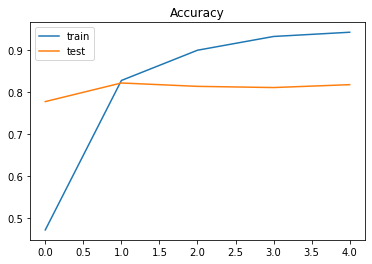

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

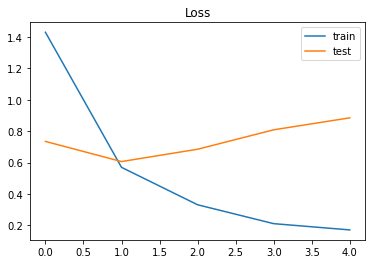

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()